# Problem Set: Scaling & Linear Regression

# Part 1: Data Preprocessing

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


1. Load the Excel dataset into a pandas DataFrame. Handle any missing values and perform data
exploration to understand the characteristics of the dataset.

In [2]:

df = pd.read_csv("real_estate.csv")


In [3]:

df.head()


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
df1 = df.copy()


In [5]:
#check for missing values
missing_values = df1.isna()


In [6]:
#fill missing values
column_mean = df1.mean()
data_filled = df1.fillna(column_mean)


In [7]:
#drop rows with missing values
data_cleaned = df1.dropna()


In [8]:
#summary statistics
df1.describe()


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [9]:
#column datatypes
df1.dtypes


No                                          int64
X1 transaction date                       float64
X2 house age                              float64
X3 distance to the nearest MRT station    float64
X4 number of convenience stores             int64
X5 latitude                               float64
X6 longitude                              float64
Y house price of unit area                float64
dtype: object

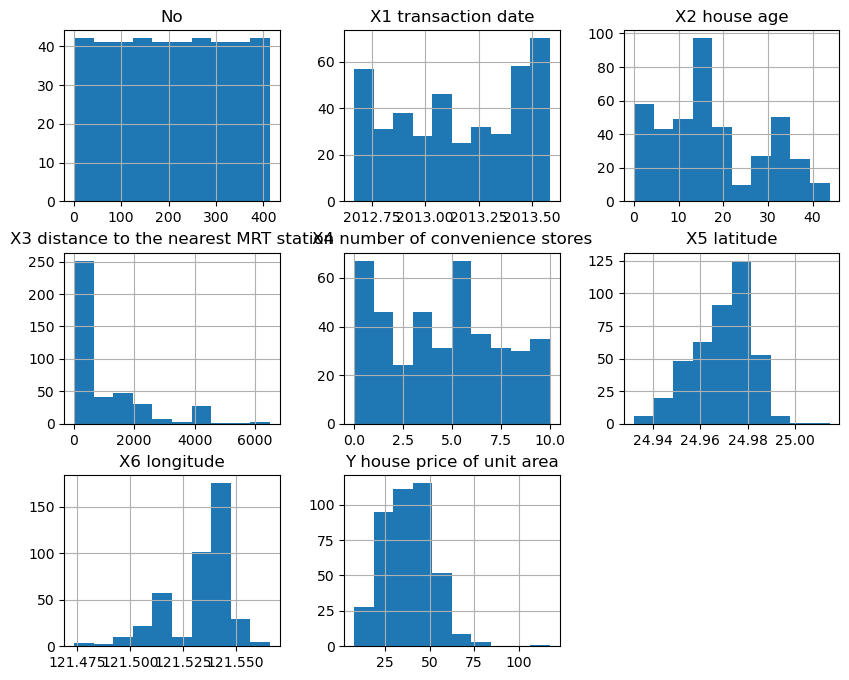

In [10]:
# Distribution Visualization:
# Histograms for numeric columns
df1.hist(figsize=(10, 8))
plt.show()


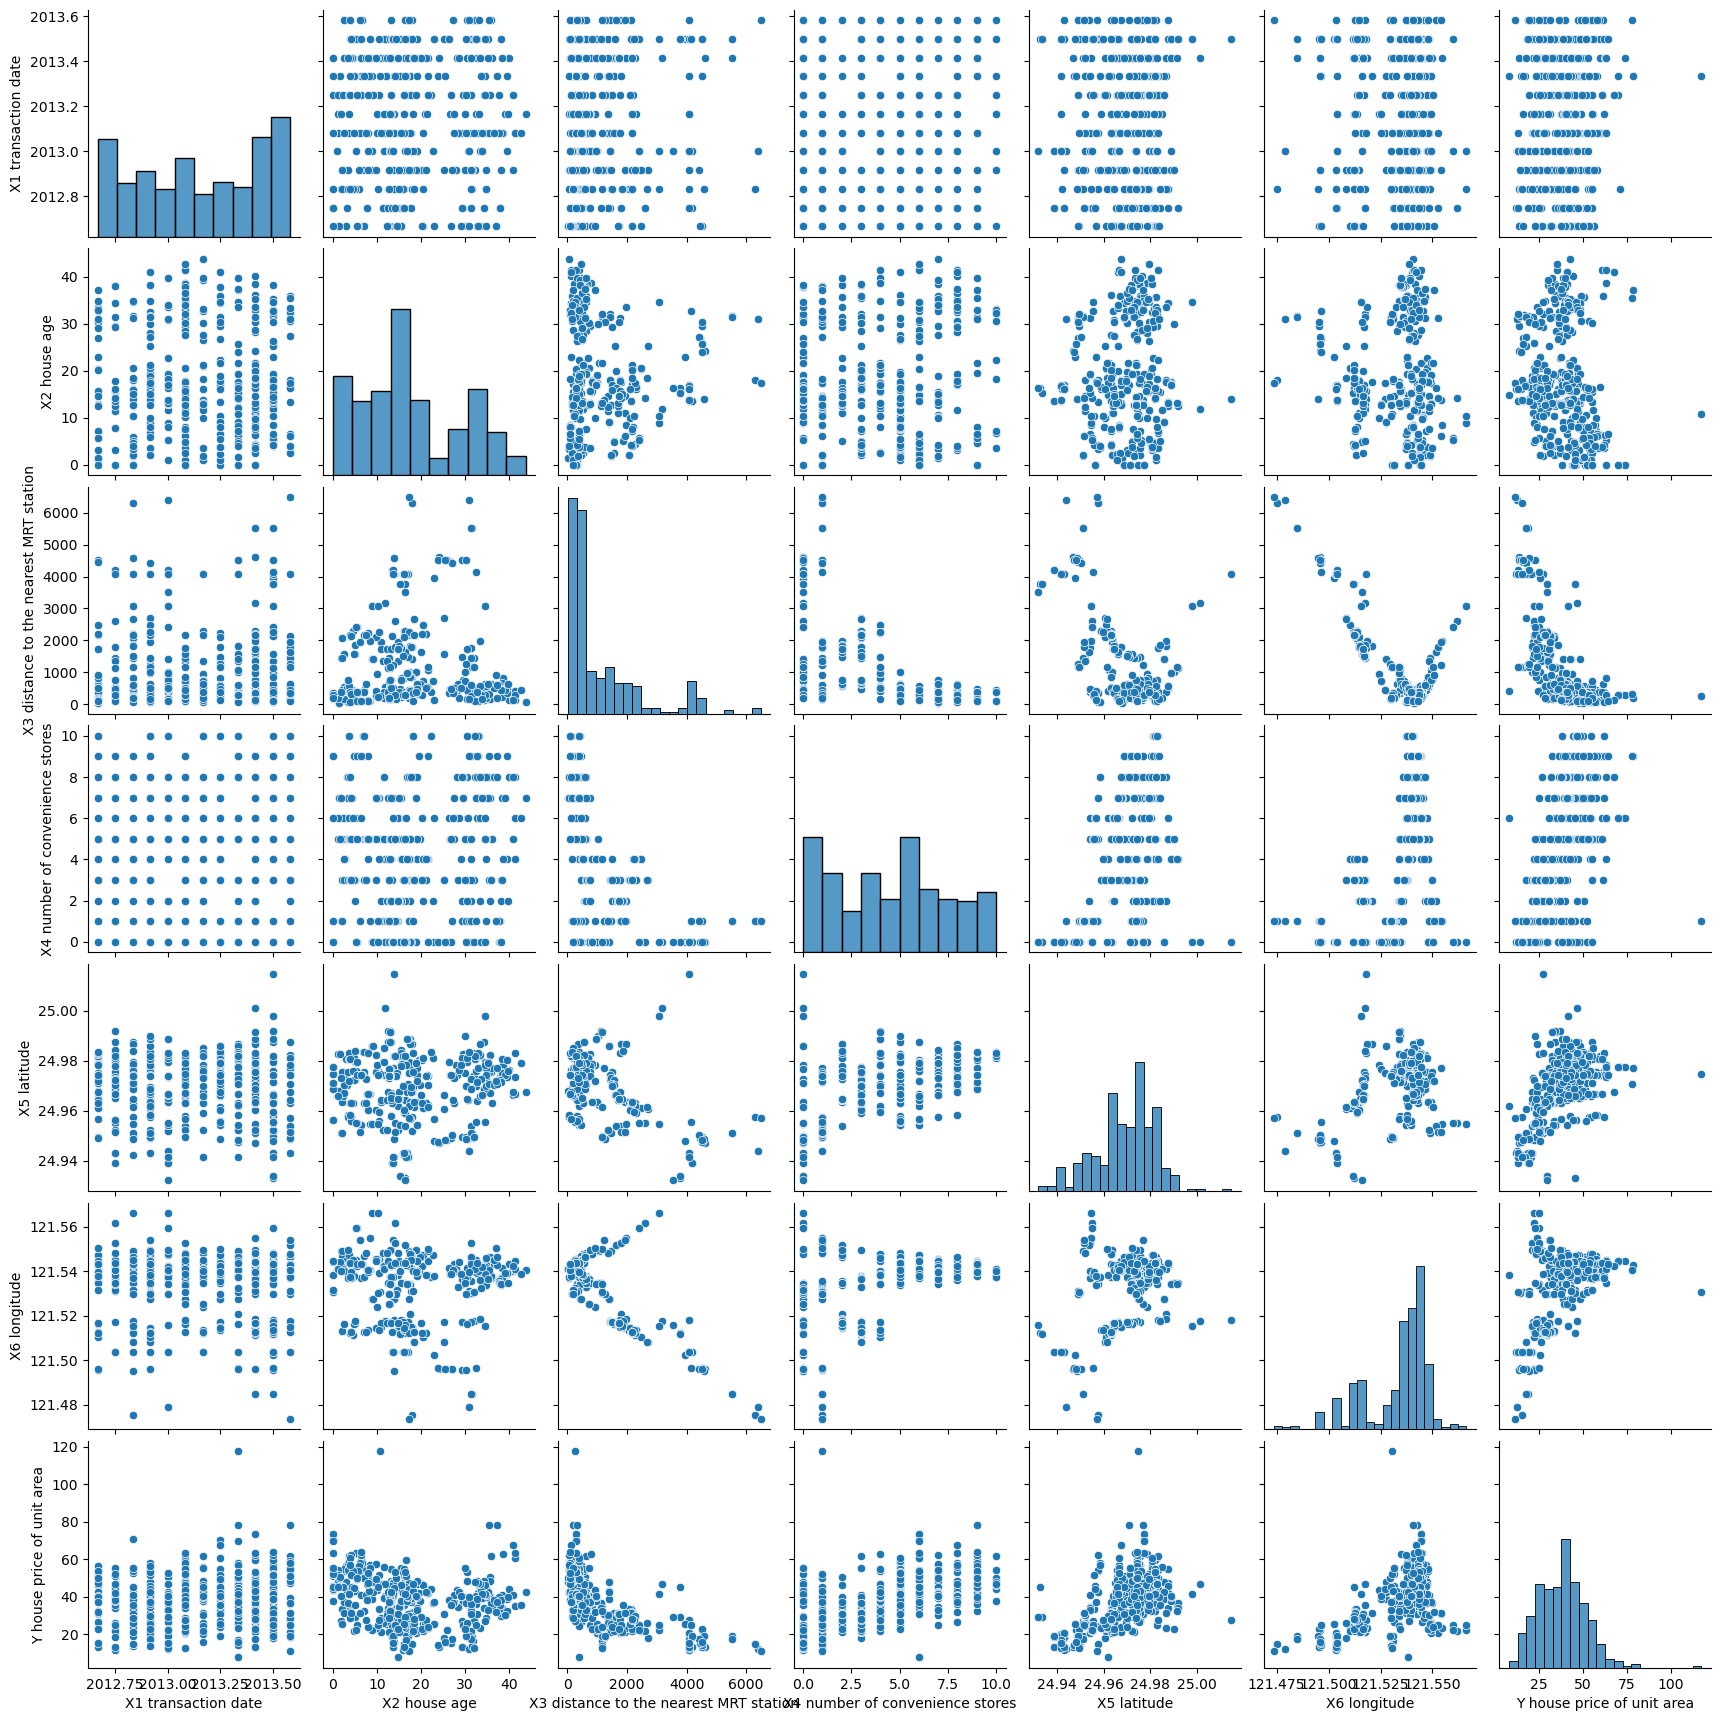

In [11]:
#pairplot

sns.pairplot(df1[['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude', 'Y house price of unit area']])



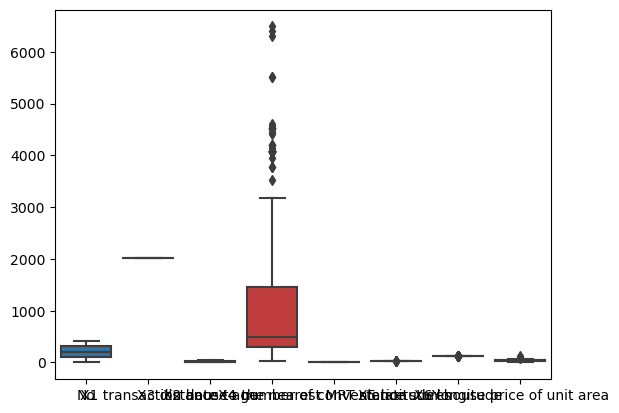

In [12]:
# Box plots to identify outliers

sns.boxplot(data=df1)
plt.show()



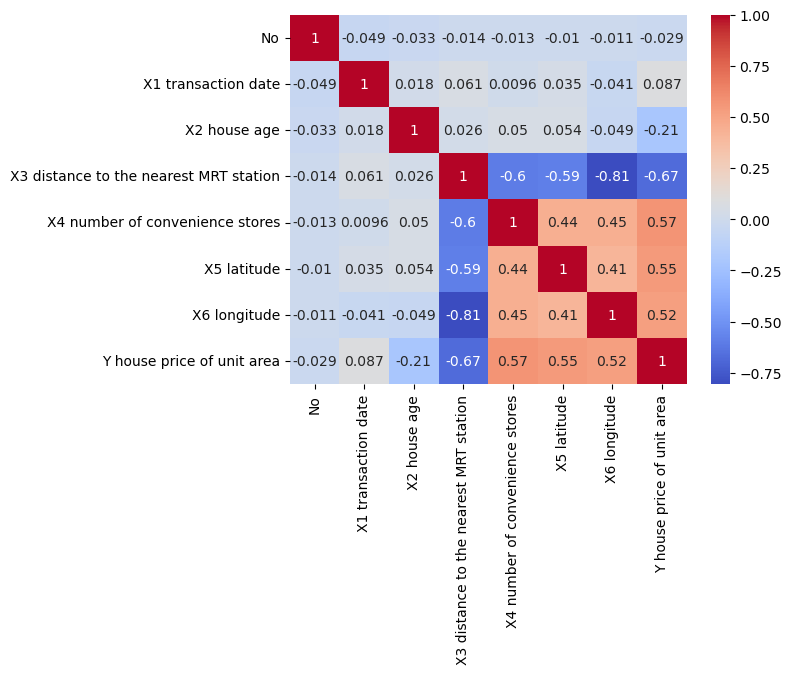

In [13]:
# Correlation Analysis:

# Correlation heatmap
correlation_matrix = df1.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()



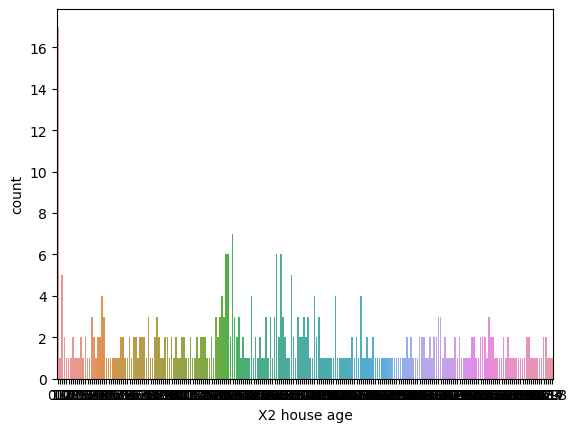

In [14]:
# Categorical Variables:

# Countplot for categorical variables
sns.countplot(x='X2 house age', data=df1)
plt.show()



In [15]:
# Crosstab for analyzing two categorical variables

pd.crosstab(df1['X5 latitude'], df1['X6 longitude'])



X6 longitude,121.47353,121.47516,121.47883,121.48458,121.49507,121.49542,121.49578,121.49587,121.49621,121.49628,...,121.55063,121.55174,121.55254,121.55282,121.55387,121.55391,121.55481,121.55964,121.56174,121.56627
X5 latitude,,,,,,,,,,,,,,,,,,,,,
24.93207,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24.93293,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24.93363,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24.93885,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24.94155,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24.99156,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24.99176,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24.99800,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


2. Extract the feature columns (X1 to X6) and the target column (Y). Split the dataset into features (X) and
target (y). (70% training & 30% testing ratio).

In [16]:

df1.head()


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [17]:

df1 = df1.rename(columns = {'X1 transaction date':'transaction date', 'X2 house age':'house age', 'X3 distance to the nearest MRT station':'distance to the nearest MRT station', 'X4 number of convenience stores':'number of convenience stores', 'X5 latitude':'latitude', 'X6 longitude':'longitude', 'Y house price of unit area':'house price of unit area'})


In [18]:
df1.head()

,No,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [19]:

df1 = df1.drop('No', axis=1)


In [20]:

df1.head()


,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [21]:
# Extract dataset into X and target y 
X = df1[['transaction date', 'house age', 'distance to the nearest MRT station', 'number of convenience stores', 'latitude', 'longitude']]
y = df1['house price of unit area']



In [22]:

X


,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude
0,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2012.917,19.5,306.59470,9,24.98034,121.53951
2,2013.583,13.3,561.98450,5,24.98746,121.54391
3,2013.500,13.3,561.98450,5,24.98746,121.54391
4,2012.833,5.0,390.56840,5,24.97937,121.54245
...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381
410,2012.667,5.6,90.45606,9,24.97433,121.54310
411,2013.250,18.8,390.96960,7,24.97923,121.53986
412,2013.000,8.1,104.81010,5,24.96674,121.54067


In [23]:

y


0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: house price of unit area, Length: 414, dtype: float64

In [24]:

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,y, test_size=0.3, random_state=42)


In [25]:

xtrain.head()


,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude
7,2013.417,20.3,287.60250,6,24.98042,121.54228
194,2013.500,15.2,3771.89500,0,24.93363,121.51158
19,2012.667,1.5,23.38284,7,24.96772,121.54102
176,2012.833,13.9,4573.77900,0,24.94867,121.49507
367,2012.833,15.0,1828.31900,2,24.96464,121.51531


3. Standardize the feature columns (X1 to X6) using Z-score scaling. Implement the scaling process
manually (without using libraries like `scikit-learn`).

In [26]:
#Z-score scalling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [27]:
for column in X.columns:
    if pd.api.types.is_numeric_dtype(X[column]):
        X[[column]] = scaler.fit_transform(X[[column]])
    else:
        continue
        
        

C:\Users\Md Monjurul Islam\AppData\Local\Temp\ipykernel_26772\896706320.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[[column]] = scaler.fit_transform(X[[column]])
C:\Users\Md Monjurul Islam\AppData\Local\Temp\ipykernel_26772\896706320.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[[column]] = scaler.fit_transform(X[[column]])
C:\Users\Md Monjurul Islam\AppData\Local\Temp\ipykernel_26772\896706320.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

In [28]:

X = X.head()
X


,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude
0,-0.823683,1.255628,-0.792495,2.007407,1.125430,0.448762
1,-0.823683,0.157086,-0.616612,1.667503,0.912444,0.401139
2,1.541151,-0.387791,-0.414015,0.307885,1.486860,0.688183
3,1.246435,-0.387791,-0.414015,0.307885,1.486860,0.688183
4,-1.121951,-1.117223,-0.549997,0.307885,0.834188,0.592937


In [29]:

# Implement the scaling process manually (without using libraries like scikit-learn).
# Xnew = Xi - Xmean / standard deviation
# where, standard deviation = sqrt{summation(Xi-Xmean)^square/total size of the population}


# Part 2: Linear Regression

4. Implement a simple linear regression model using the scaled features (X1 to X6) to predict the house
price (Y). You can use gradient descent for optimization. Calculate the regression coefficients (intercept
and slope) and write down the regression equation.

In [30]:

from sklearn.linear_model import LinearRegression
reg = LinearRegression()


In [31]:

reg.fit(xtrain, ytrain)


LinearRegression()

In [32]:

reg.coef_


array([ 5.84779706e+00, -2.42545813e-01, -5.13873381e-03,  1.07449530e+00,
        2.39096949e+02, -5.22351591e+01])

In [33]:

reg.intercept_


-11350.740518771496

In [34]:

y_pred = reg.predict(xtest) #corrosponding to ytrain
y_pred


array([47.55430212, 41.08372744, 44.25551663, 40.51685112, 27.43467608,
       45.85435624, 44.70296876, 46.57752144, 23.86072119, 54.35199522,
       34.63011363, 36.34958785, 37.34518438, 23.49428018, 36.02735916,
       34.56828629, 44.01823263, 45.04246804, 29.9554971 , 43.96338099,
        0.09450675, 35.291724  , 48.09455663, 45.54503941, 10.6006418 ,
       39.9786752 , 11.9116313 , 42.79356737, 35.67204264, 38.09573519,
       12.98819108, 40.13164278, 35.44632378, 27.09263458, 46.57230583,
       32.08134705, 50.62714445, 13.2533591 , 49.8007962 , 40.83574406,
       39.02898306, 40.92260381, 47.61743515, 37.68719274, 39.67028734,
       46.64468542, 43.57375428, 19.40851794, 46.95629589, 45.93056809,
       48.03966928, 48.79469044, 43.06419598, 43.00021216, 36.56049741,
       14.20568662, 37.31495695, 34.30916207, 28.33264665, 46.09215428,
       32.92580137, 32.83028385, 14.20568662,  8.3906898 ,  9.79703308,
       34.33939647, 27.76485421, 46.75860125, 33.77722462, 30.85

In [35]:

# General Equation for Linear Regression: Y = M1*X1 + M2*X2 + ...........Mn*Xn + C
# here, M = Coefficient of the input feature X, C = Intercept, X = Features, Y = Predicted Output / Label



5. Evaluate the model's performance using metrics such as Mean Squared Error (MSE) and R-squared.
Interpret the R-squared value in the context of this regression.

In [36]:
# mean squared errors

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(ytest, y_pred)


In [37]:

mse


73.56837932850077

In [38]:
# R-squared

from sklearn.metrics import r2_score
r2 = r2_score(ytest, y_pred)


In [39]:

r2


0.5600638168604352

Interpret the R-squared value in the context of this regression:
It indicates that your linear regression model explains approximately 56% of the variance in the target variable.
This value indicates that your model is able to explain about 56% of the variability in the dependent variable (house price) using the independent variables (features X1 to X6).
In other words, the model captures more than half of the variability in the target variable, which suggests that it has some predictive power.
R-squared value of 0.560 is a positive sign, the interpretation also depends on the specific problem and domain. In some cases, achieving a high R-squared value might be challenging due to the nature of the data or the complexity of the underlying relationships.

# Part 3: Feature Scaling Comparison

6. Train another linear regression model without scaling the features. Compare the performance of this
model with the scaled model from Part 2 in terms of convergence speed and prediction accuracy.

In [40]:

df2 = df.copy()


In [41]:

df2.head()


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [42]:

df2 = df2.drop('No', axis=1)


In [43]:

df2.head()


,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [44]:

df2_x = df2[['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']]
df2_y = df2['Y house price of unit area']


In [45]:
df2_x.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2012.917,19.5,306.59470,9,24.98034,121.53951
2,2013.583,13.3,561.98450,5,24.98746,121.54391
3,2013.500,13.3,561.98450,5,24.98746,121.54391
4,2012.833,5.0,390.56840,5,24.97937,121.54245


In [46]:

x_train, x_test, y_train, y_test = train_test_split(df2_x, df2_y, test_size=.30, random_state=42)


In [47]:

x_train.shape


(289, 6)

In [48]:

x_test.shape


(125, 6)

In [52]:

from sklearn.linear_model import LinearRegression
reg2 = LinearRegression()



In [53]:

reg2.fit(x_train, y_train)



LinearRegression()

In [54]:
reg2.coef_

array([ 5.84779706e+00, -2.42545813e-01, -5.13873381e-03,  1.07449530e+00,
        2.39096949e+02, -5.22351591e+01])

In [55]:

reg2.intercept_



-11350.740518771496

In [57]:

y_pred2 = reg2.predict(x_test)
y_pred2


array([47.55430212, 41.08372744, 44.25551663, 40.51685112, 27.43467608,
       45.85435624, 44.70296876, 46.57752144, 23.86072119, 54.35199522,
       34.63011363, 36.34958785, 37.34518438, 23.49428018, 36.02735916,
       34.56828629, 44.01823263, 45.04246804, 29.9554971 , 43.96338099,
        0.09450675, 35.291724  , 48.09455663, 45.54503941, 10.6006418 ,
       39.9786752 , 11.9116313 , 42.79356737, 35.67204264, 38.09573519,
       12.98819108, 40.13164278, 35.44632378, 27.09263458, 46.57230583,
       32.08134705, 50.62714445, 13.2533591 , 49.8007962 , 40.83574406,
       39.02898306, 40.92260381, 47.61743515, 37.68719274, 39.67028734,
       46.64468542, 43.57375428, 19.40851794, 46.95629589, 45.93056809,
       48.03966928, 48.79469044, 43.06419598, 43.00021216, 36.56049741,
       14.20568662, 37.31495695, 34.30916207, 28.33264665, 46.09215428,
       32.92580137, 32.83028385, 14.20568662,  8.3906898 ,  9.79703308,
       34.33939647, 27.76485421, 46.75860125, 33.77722462, 30.85

In [58]:

mse2 = mean_squared_error(y_test, y_pred2)
mse2


73.56837932850077

In [59]:

r_2 = r2_score(y_test, y_pred2)
r_2


0.5600638168604352

In [60]:
# Compare the performance of this model with the scaled model from Part 2 in terms of convergence speed and prediction accuracy.







# Part 4: Visualization and Analysis

7. Create scatter plots to visualize the relationship between each feature (X1 to X6) and the target
variable (Y). Discuss the patterns you observe in the plots.

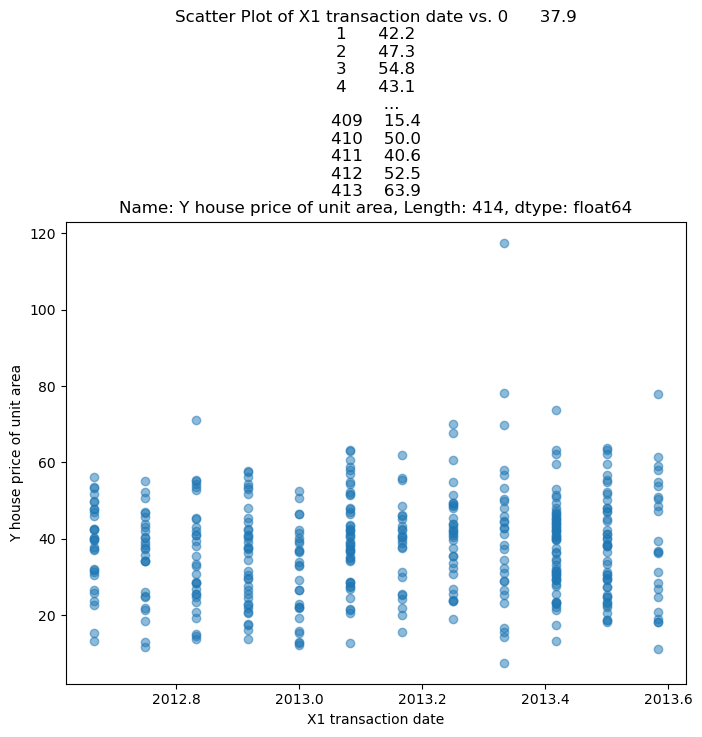

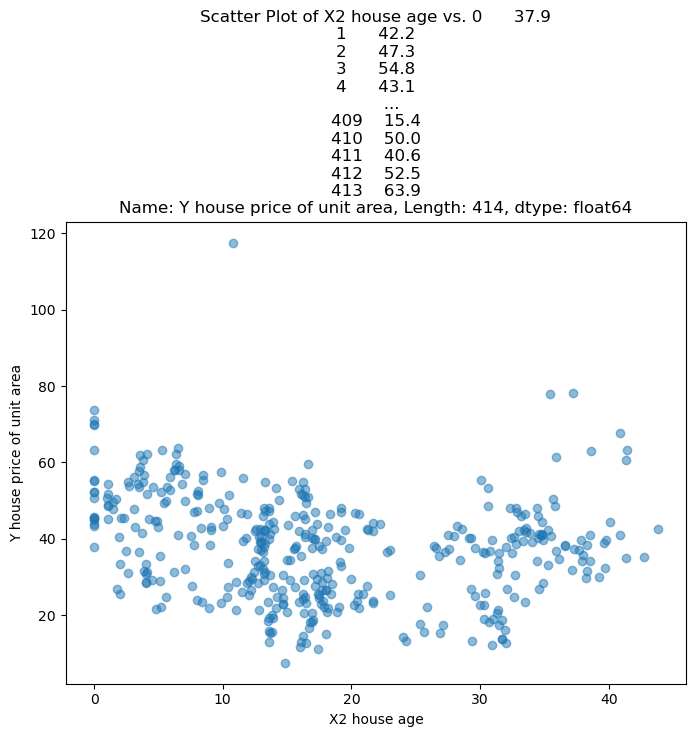

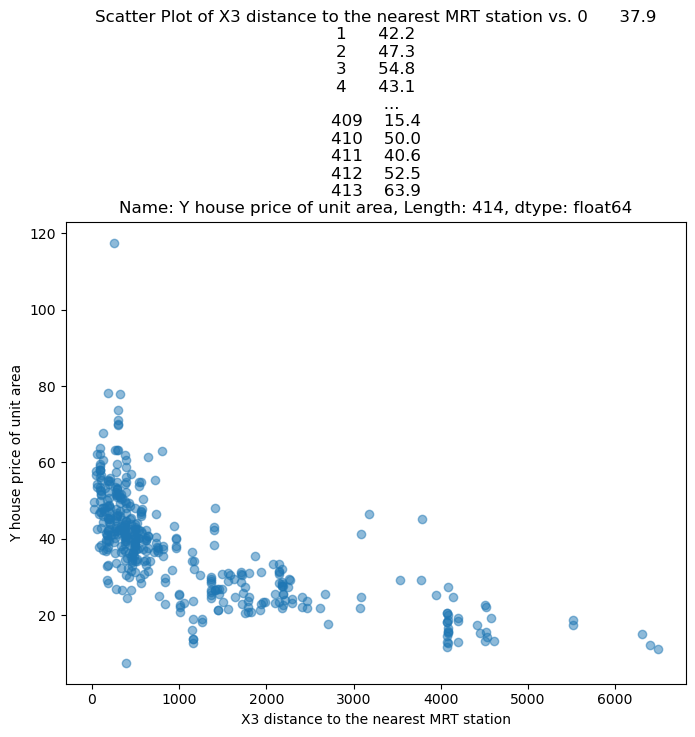

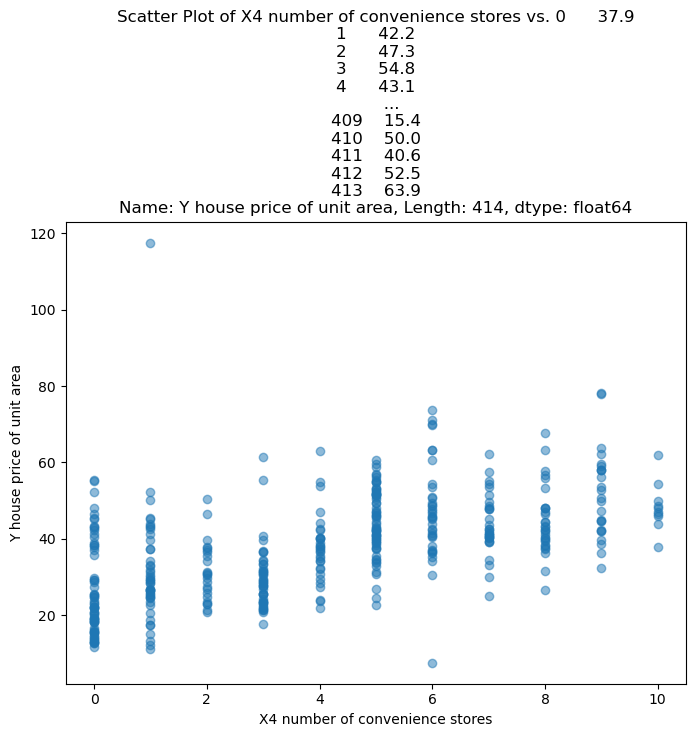

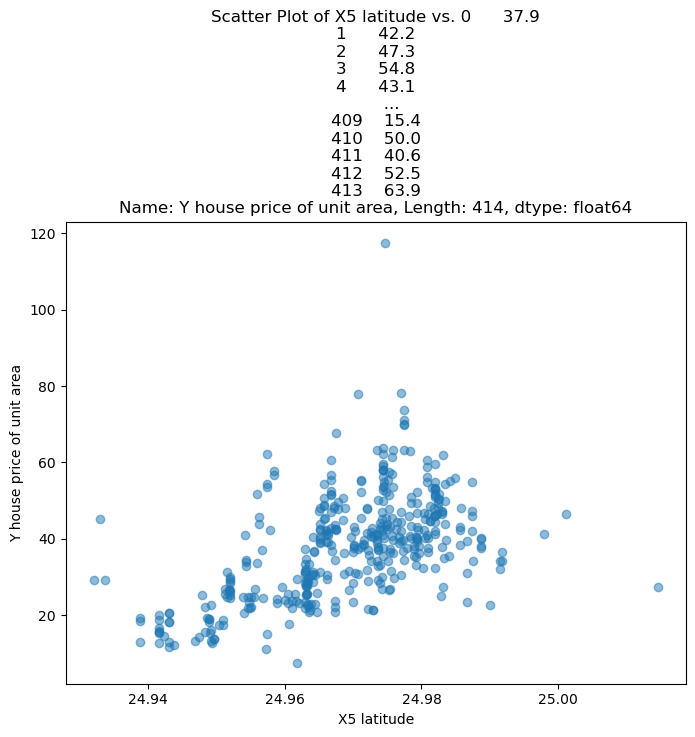

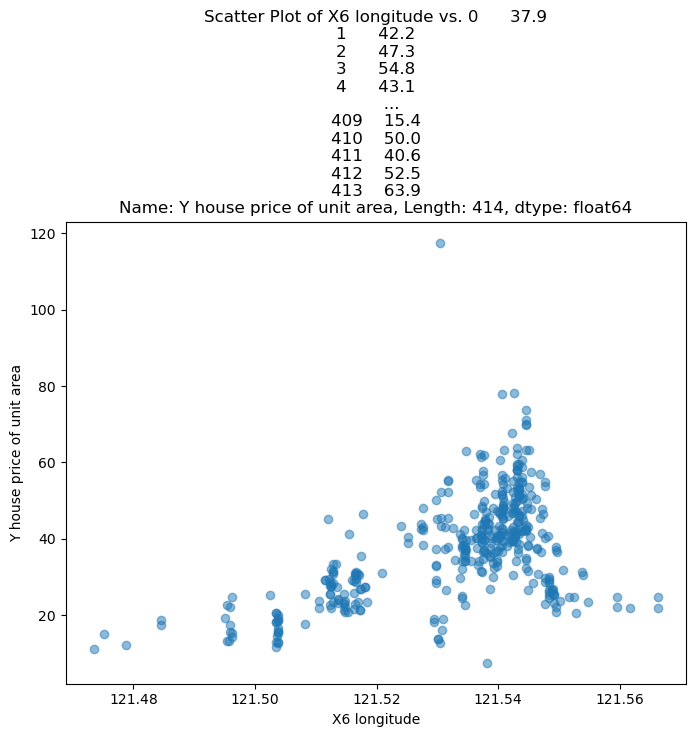

In [61]:
#create scatter plot at df2

for i in df2_x:
    plt.figure(figsize=(8, 6))
    plt.scatter(df2_x[i], df2['Y house price of unit area'], alpha=0.5)
    plt.xlabel(i)
    plt.ylabel('Y house price of unit area')
    plt.title(f"Scatter Plot of {i} vs. {df2_y}")
    plt.show()
 




In [62]:
# Discussion






8. Visualize the predicted house prices from the scaled model against the actual house prices. Interpret
the results and discuss any discrepancies.

<function matplotlib.pyplot.show(close=None, block=None)>

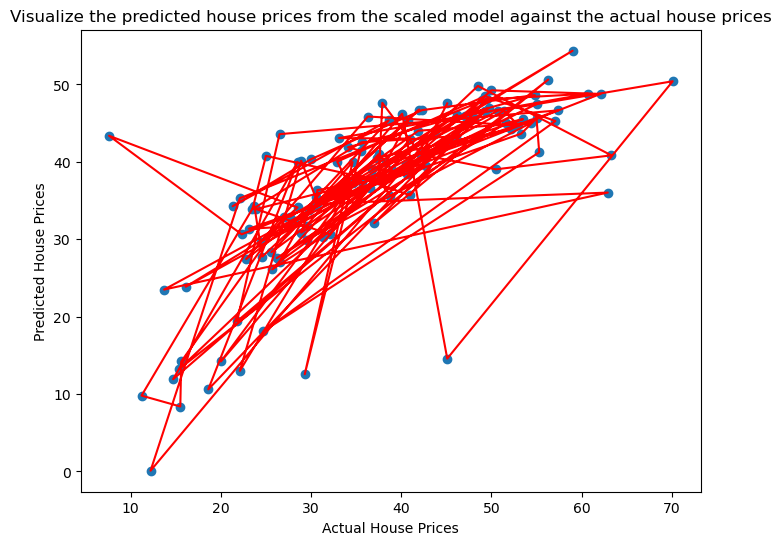

In [63]:

plt.figure(figsize=(8,6))
plt.scatter(ytest, y_pred)
plt.plot(ytest, y_pred, color='red')
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.title('Visualize the predicted house prices from the scaled model against the actual house prices')
#plt.legend
plt.show



In [64]:
# Interpret the results and discuss any discrepancies:







# Part 5: Advanced Problem (Optional)

9. Implement Min-Max scaling for the feature columns (X1 to X6) manually (without using libraries).
 Train a linear regression model using the Min-Max scaled features and compare its performance with the
Z-score scaled and unscaled models.

In [65]:

df2.head()


,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [66]:

df3 = df2.copy()


In [67]:

for column in df3.columns:
    column_mean = df3[column].sum() / len(df3[column])
    column_max = df3[column].max()
    column_min = df3[column].min()
    
    df3[column] = [(value - column_mean) / (column_max - column_min) for value in df3[column]]
    
    

In [68]:

df3.head()


,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,-0.253243,0.326197,-0.154534,0.59058,0.169049,0.074174,-0.000730
1,-0.253243,0.040809,-0.120237,0.49058,0.137057,0.066303,0.038397
2,0.473831,-0.100743,-0.080732,0.09058,0.223339,0.113747,0.084803
3,0.383219,-0.100743,-0.080732,0.09058,0.223339,0.113747,0.153046
4,-0.344947,-0.290241,-0.107248,0.09058,0.125302,0.098004,0.046586


In [69]:

df4 = df.copy()


In [70]:

df4_x = df[['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']]
df4_y = df['Y house price of unit area']


In [71]:

df4_x.head()


,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2012.917,19.5,306.59470,9,24.98034,121.53951
2,2013.583,13.3,561.98450,5,24.98746,121.54391
3,2013.500,13.3,561.98450,5,24.98746,121.54391
4,2012.833,5.0,390.56840,5,24.97937,121.54245


In [72]:
# Train a linear regression model using the Min-Max scaled features

from sklearn.preprocessing import MinMaxScaler
m = MinMaxScaler()


In [73]:

for column in df4_x.columns:
    if pd.api.types.is_numeric_dtype(df4_x[column]):
       df4_x[[column]] = m.fit_transform(df4_x[[column]])
    else:
        continue

        


C:\Users\Md Monjurul Islam\AppData\Local\Temp\ipykernel_26772\767757693.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4_x[[column]] = m.fit_transform(df4_x[[column]])
C:\Users\Md Monjurul Islam\AppData\Local\Temp\ipykernel_26772\767757693.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4_x[[column]] = m.fit_transform(df4_x[[column]])
C:\Users\Md Monjurul Islam\AppData\Local\Temp\ipykernel_26772\767757693.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [74]:

df4_x.head()


,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,0.272926,0.730594,0.009513,1.0,0.616941,0.719323
1,0.272926,0.445205,0.043809,0.9,0.584949,0.711451
2,1.000000,0.303653,0.083315,0.5,0.671231,0.758896
3,0.909389,0.303653,0.083315,0.5,0.671231,0.758896
4,0.181223,0.114155,0.056799,0.5,0.573194,0.743153


In [75]:

x_train3, x_test3, y_train3, y_test3 = train_test_split(df4_x, df4_y, test_size=0.30, random_state=42)


In [76]:

x_train3.head()


,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
7,0.818777,0.463470,0.040872,0.6,0.585919,0.741320
194,0.909389,0.347032,0.579849,0.0,0.018905,0.410287
19,0.000000,0.034247,0.000000,0.7,0.432016,0.727733
176,0.181223,0.317352,0.703890,0.0,0.201163,0.232262
367,0.181223,0.342466,0.279201,0.2,0.394692,0.450507


In [77]:

from sklearn.linear_model import LinearRegression
reg3 = LinearRegression()


In [78]:

reg3.fit(x_train3, y_train3)


LinearRegression()

In [79]:

reg3.coef_


array([  5.3565821 , -10.6235066 , -33.22005471,  10.74495298,
        19.73028024,  -4.84428865])

In [80]:

reg.intercept_


-11350.740518771496

In [81]:

y_pred3 = reg3.predict(x_test3) #corrosponding to ytrain
y_pred3


array([47.55430212, 41.08372744, 44.25551663, 40.51685112, 27.43467608,
       45.85435624, 44.70296876, 46.57752144, 23.86072119, 54.35199522,
       34.63011363, 36.34958785, 37.34518438, 23.49428018, 36.02735916,
       34.56828629, 44.01823263, 45.04246804, 29.9554971 , 43.96338099,
        0.09450675, 35.291724  , 48.09455663, 45.54503941, 10.6006418 ,
       39.9786752 , 11.9116313 , 42.79356737, 35.67204264, 38.09573519,
       12.98819108, 40.13164278, 35.44632378, 27.09263458, 46.57230583,
       32.08134705, 50.62714445, 13.2533591 , 49.8007962 , 40.83574406,
       39.02898306, 40.92260381, 47.61743515, 37.68719274, 39.67028734,
       46.64468542, 43.57375428, 19.40851794, 46.95629589, 45.93056809,
       48.03966928, 48.79469044, 43.06419598, 43.00021216, 36.56049741,
       14.20568662, 37.31495695, 34.30916207, 28.33264665, 46.09215428,
       32.92580137, 32.83028385, 14.20568662,  8.3906898 ,  9.79703308,
       34.33939647, 27.76485421, 46.75860125, 33.77722462, 30.85

In [82]:
#compare its performance with the Z-score scaled and unscaled models.








In [83]:
#summary





